<a href="https://colab.research.google.com/github/Gin-Arata/PCVK_13_Gaco-Razan-Kamil/blob/main/Week3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Import Library
from google.colab import drive
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
# @title Mount Drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# @title Mengubah citra brightness

print("Mengubah tingkat kecerahan citra")
print("=================================")

# Untuk melakukan input brightness dari user
try:
  brightness = int(input("Masukkan nilai kecerahan: "))
except ValueError:
  print("Input harus berupa angka")

# Untuk Membaca image
original = cv.imread("/content/drive/MyDrive/PCVK_Minggu2/KTP.jpeg")

# Melakukan copy terhadap image menuju array baru
brightness_image = np.zeros(original.shape, original.dtype)

# Melakukan penambahan brightness menggunakan for loop
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# tanpa menggunakan for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra


KeyboardInterrupt: Interrupted by user

# **Tugas**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:
3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:
4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

In [ ]:
# @title 1. Mengimplementasikan inverse citra pada image

# Load Image
original_inverse = cv.imread("/content/drive/MyDrive/PCVK_Minggu2/KTP.jpeg")
inverse = np.zeros(original.shape, original.dtype)

# Looping untuk melakukan inverse citra pada image
for y in range(original_inverse.shape[0]):
  for x in range(original_inverse.shape[1]):
    for c in range(original_inverse.shape[2]):
      inverse[y, x, c] = np.clip(255 - original_inverse[y, x, c], 0, 255)

# Menampilkan image perbandingan inverse citra
final_frame = cv.hconcat((original_inverse, inverse))
cv2_imshow(final_frame)

In [ ]:
# @title 2. Meimplementasikan tranformasi kontras pada image

print("Mengubah kontras dan tingkat kecerahan citra")
print("==============================================")

# Input brightness dan contrast dari user
try:
  brightness = int(input("Masukkan nilai brightness [-255 - 255]: "))
  contrast = int(input("Masukkan nilai contrast [1.0 - 3.0]: "))
except ValueError:
  print("Input harus berupa angka")

# Load Image
original_image = cv.imread("/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/female.tiff")
contrast_image = np.zeros(original_image.shape, original_image.dtype)

# Melakukan looping untuk menambahkan contrast dan brightness
for y in range(original_image.shape[0]):
  for x in range(original_image.shape[1]):
    for c in range(original_image.shape[2]):
      contrast_image[y, x, c] = np.clip(contrast * original_image[y, x, c] + brightness, 0, 255)

# Menampilkan perbandingan image akhir
final_frame = cv.hconcat((original_image, contrast_image))
cv2_imshow(final_frame)

In [ ]:
# @title 3. Implementasi logarithmic brightness

print("Mengubah Tingkat Kecerahan citra dengan tranformasi log")
print("=======================================================")

# Input brightness dari user
try:
  constanta = int(input("Masukkan nilai brightness: "))
except ValueError:
  print("Input harus berupa angka")

# Load Image
original_image = cv.imread("/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/female.tiff")
log_image = np.zeros(original_image.shape, original_image.dtype)

# Looping untuk Logarithmic Brightness
for y in range(original_image.shape[0]):
  for x in range(original_image.shape[1]):
    for c in range(original_image.shape[2]):
      log_image[y, x, c] = np.clip(constanta * np.log(1 + original_image[y, x, c]), 0, 255)

# Menampilkan perbandingan image ori dan brightness upscale
final_frame = cv.hconcat((original_image, log_image))
cv2_imshow(final_frame)

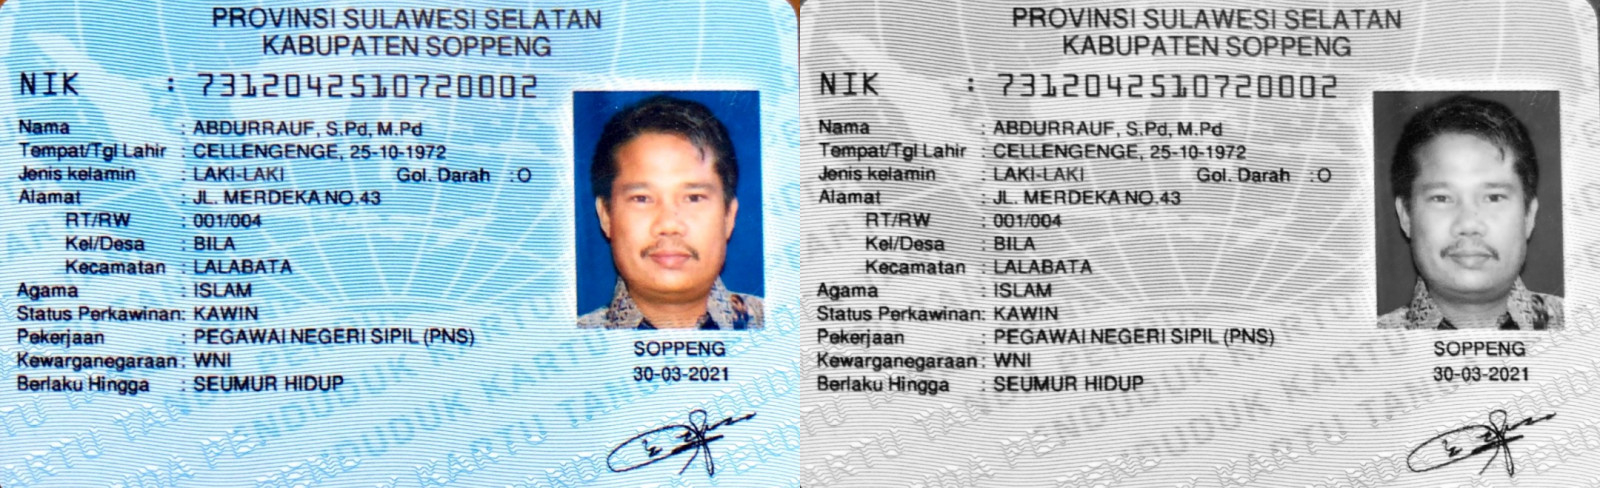

In [14]:
# @title 4a. Implementasi grayscale menggunakan averaging

# Load Image
original_image = cv.imread("/content/drive/MyDrive/PCVK_Minggu2/KTP.jpeg")
grayscale_avg_image = np.mean(original_image, axis=2)

grayscale_avg_image = cv.cvtColor(grayscale_avg_image.astype(original_image.dtype), cv.COLOR_GRAY2BGR)

# Menampilkan image perbandingan dengan original image dan grayscale average
final_frame = cv.hconcat((original_image, grayscale_avg_image))
cv2_imshow(final_frame)

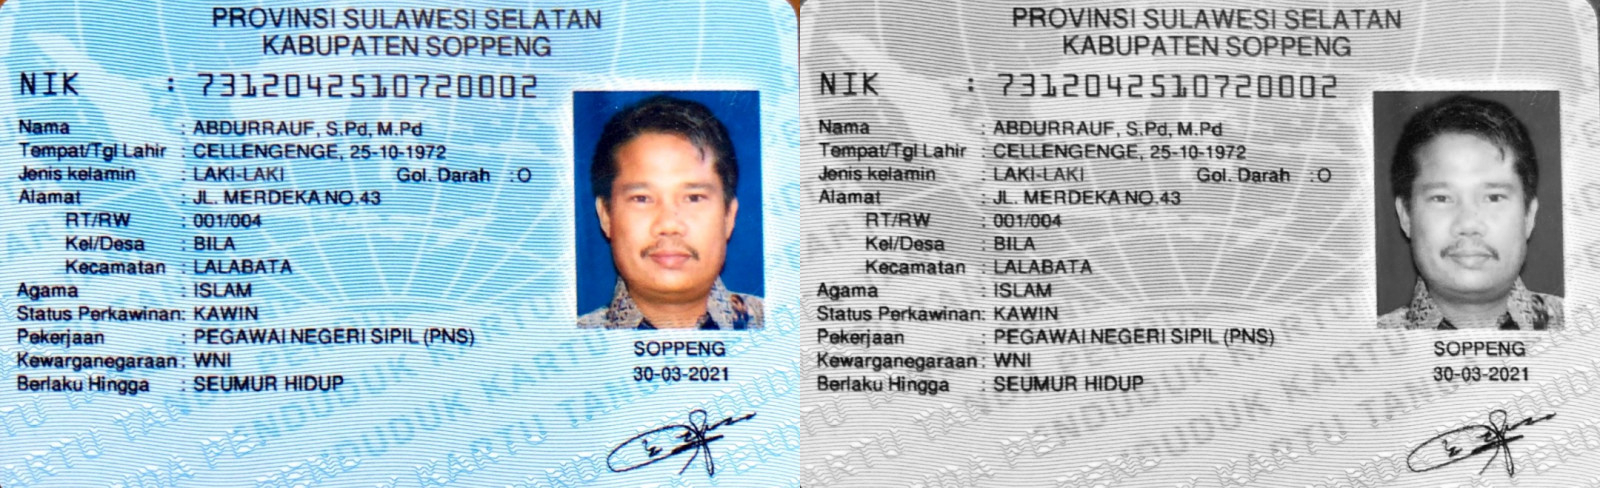

In [36]:
# @title 4b. Implementasi convert grayscale lightness method

# Load Image
original_image = cv.imread("/content/drive/MyDrive/PCVK_Minggu2/KTP.jpeg")
# grayscale_lightness_image = np.zeros((original_image.shape[0], original_image.shape[1]), original_image.dtype)

# Membuat array grayscale 1 channel
grayscale_lightness_image = np.zeros((original_image.shape[0], original_image.shape[1]), dtype=np.uint8)

# Looping untuk mengubah RGB image menggunakan lightness method
for y in range(original_image.shape[0]):
    for x in range(original_image.shape[1]):
        max_rgb = np.float32(max(original_image[y, x, 2], original_image[y, x, 1], original_image[y, x, 0]))
        min_rgb = np.float32(min(original_image[y, x, 2], original_image[y, x, 1], original_image[y, x, 0]))
        lightness = (max_rgb + min_rgb) / 2
        grayscale_lightness_image[y, x] = np.uint8(np.clip(lightness, 0, 255))

# Mengubah grayscale image kembali ke 3 channel untuk ditampilkan
grayscale_3channel = cv.cvtColor(grayscale_lightness_image, cv.COLOR_GRAY2BGR)

# Menampilkan image perbandingan dengan original image dan grayscale average
final_frame = cv.hconcat((original_image, grayscale_3channel))
cv2_imshow(final_frame)

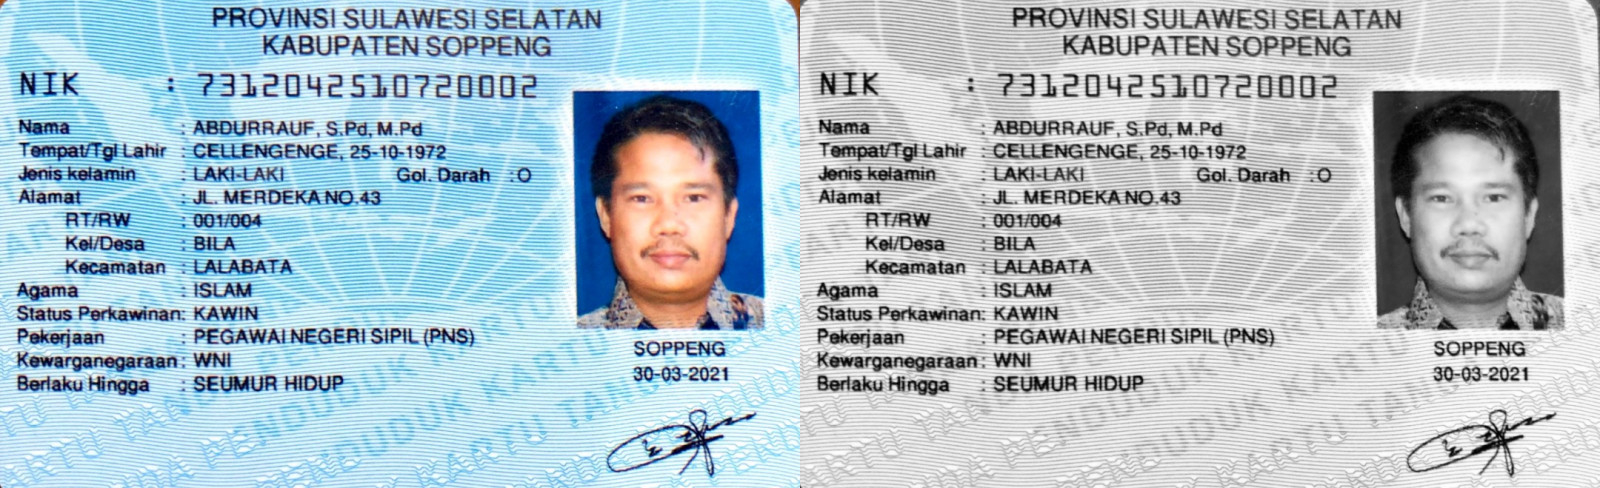

In [22]:
# @title 4c. Implementasi Grayscale metode luminance

# Load Image
original_image = cv.imread("/content/drive/MyDrive/PCVK_Minggu2/KTP.jpeg")
grayscale_luminance_image = np.zeros(original_image.shape, original_image.dtype)

# Looping untuk melakukan konversi
for y in range(original_image.shape[0]):
  for x in range(original_image.shape[1]):
    grayscale_luminance_image[y, x] = np.clip(0.21 * original_image[y, x, 2] + 0.72 * original_image[y, x, 1] + 0.07 * original_image[y, x, 0], 0, 255)

# Menampilkan hasil konversi
final_frame = cv.hconcat((original_image, grayscale_luminance_image))
cv2_imshow(final_frame)

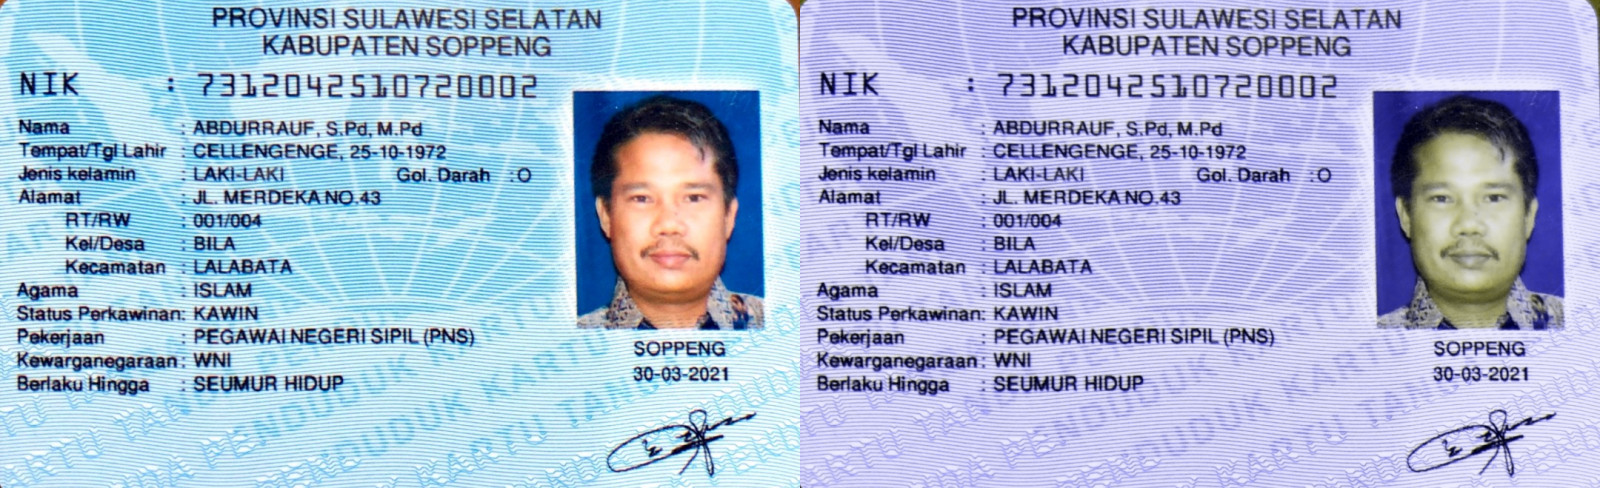

In [44]:
# Load Image
original_image = cv.imread("/content/drive/MyDrive/PCVK_Minggu2/KTP.jpeg")
grayscale_rg_image = np.zeros(original_image.shape, original_image.dtype)

# Looping untuk melakukan konversi
for y in range(original_image.shape[0]):
  for x in range(original_image.shape[1]):
    gray_value = np.clip(0.21 * original_image[y, x, 2] + 0.72 * original_image[y, x, 1], 0, 255)

    # Assign gray value ke red dan green channel, biarkan blue channel tetap
    grayscale_rg_image[y, x, 0] = original_image[y, x, 0]  # Blue channel tetap
    grayscale_rg_image[y, x, 1] = gray_value  # Green channel jadi gray
    grayscale_rg_image[y, x, 2] = gray_value  # Red channel jadi gray

# Menampilkan hasil konversi
final_frame = cv.hconcat((original_image, grayscale_rg_image))
cv2_imshow(final_frame)